In [7]:
library(tidyverse)

In [8]:
data <- read.csv("diabetes.csv")

In [10]:
head(data)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1
6,5,116,74,0,0,25.6,0.201,30,0


In [11]:
glimpse(data)

Rows: 768
Columns: 9
$ Pregnancies              <int> 6, 1, 8, 1, 0, 5, 3, 10, 2, 8, 4, 10, 10, 1, ~
$ Glucose                  <int> 148, 85, 183, 89, 137, 116, 78, 115, 197, 125~
$ BloodPressure            <int> 72, 66, 64, 66, 40, 74, 50, 0, 70, 96, 92, 74~
$ SkinThickness            <int> 35, 29, 0, 23, 35, 0, 32, 0, 45, 0, 0, 0, 0, ~
$ Insulin                  <int> 0, 0, 0, 94, 168, 0, 88, 0, 543, 0, 0, 0, 0, ~
$ BMI                      <dbl> 33.6, 26.6, 23.3, 28.1, 43.1, 25.6, 31.0, 35.~
$ DiabetesPedigreeFunction <dbl> 0.627, 0.351, 0.672, 0.167, 2.288, 0.201, 0.2~
$ Age                      <int> 50, 31, 32, 21, 33, 30, 26, 29, 53, 54, 30, 3~
$ Outcome                  <int> 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, ~


In [14]:
colnames(data)

[1] "Pregnancies"              "Glucose"                 
[3] "BloodPressure"            "SkinThickness"           
[5] "Insulin"                  "BMI"                     
[7] "DiabetesPedigreeFunction" "Age"                     
[9] "Outcome"

In [15]:
summary(data)

  Pregnancies        Glucose      BloodPressure    SkinThickness  
 Min.   : 0.000   Min.   :  0.0   Min.   :  0.00   Min.   : 0.00  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 62.00   1st Qu.: 0.00  
 Median : 3.000   Median :117.0   Median : 72.00   Median :23.00  
 Mean   : 3.845   Mean   :120.9   Mean   : 69.11   Mean   :20.54  
 3rd Qu.: 6.000   3rd Qu.:140.2   3rd Qu.: 80.00   3rd Qu.:32.00  
 Max.   :17.000   Max.   :199.0   Max.   :122.00   Max.   :99.00  
    Insulin           BMI        DiabetesPedigreeFunction      Age       
 Min.   :  0.0   Min.   : 0.00   Min.   :0.0780           Min.   :21.00  
 1st Qu.:  0.0   1st Qu.:27.30   1st Qu.:0.2437           1st Qu.:24.00  
 Median : 30.5   Median :32.00   Median :0.3725           Median :29.00  
 Mean   : 79.8   Mean   :31.99   Mean   :0.4719           Mean   :33.24  
 3rd Qu.:127.2   3rd Qu.:36.60   3rd Qu.:0.6262           3rd Qu.:41.00  
 Max.   :846.0   Max.   :67.10   Max.   :2.4200           Max.   :81.00  
    Outcome  

## Data visualization

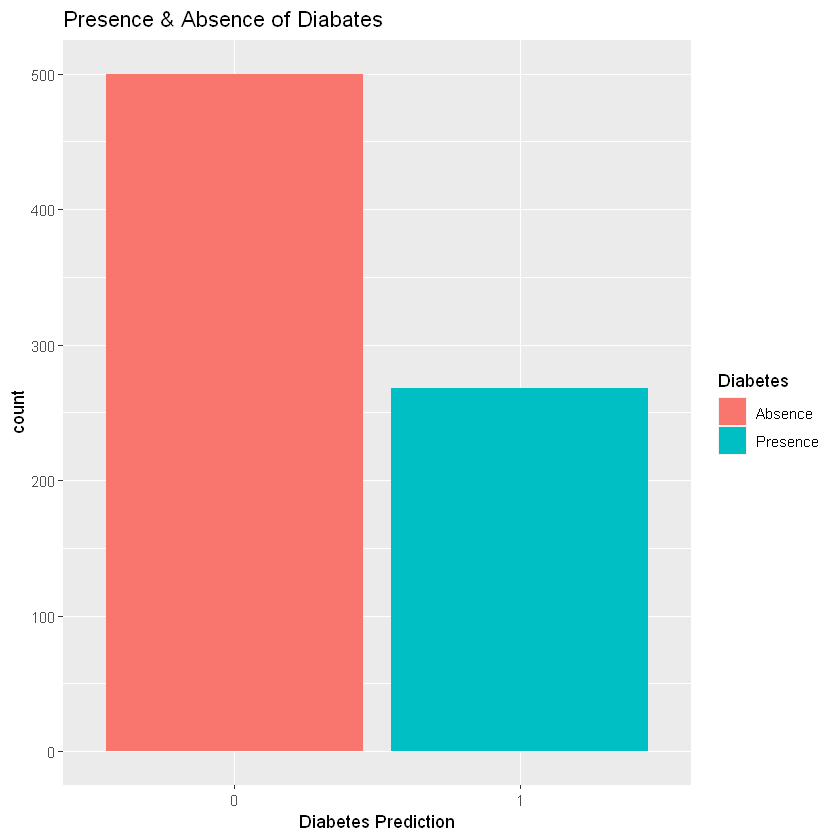

In [31]:
# Bar Plot for Outcome
ggplot(data,aes(x=Outcome,fill=Outcome))+
    geom_bar()+
    xlab("Diabetes Prediction")+
    ylab("count")+
    ggtitle("Presence & Absence of Diabates")+
    scale_fill_discrete(name="Diabetes",label= c("Absence","Presence"))

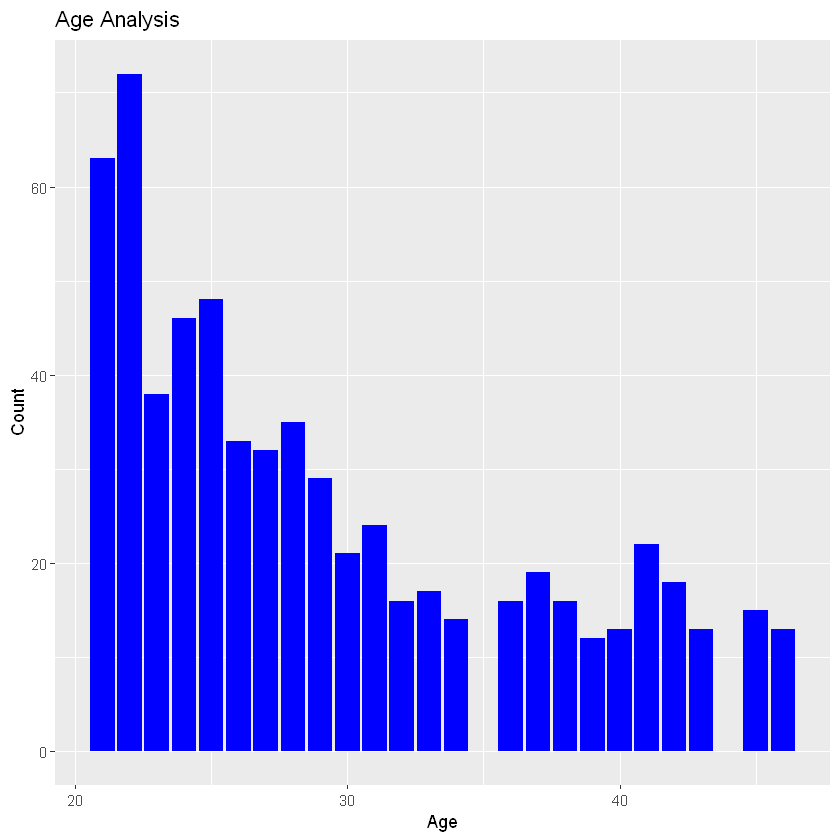

In [32]:
# Count the frequency of the values of age

data %>%
    group_by(Age) %>%
    count() %>%
    filter(n>10) %>%
    ggplot()+
    geom_col(aes(Age,n),fill="blue")+
    ggtitle("Age Analysis")+
    xlab("Age")+
    ylab("Count")

<ggproto object: Class FacetGrid, Facet, gg>
    compute_layout: function
    draw_back: function
    draw_front: function
    draw_labels: function
    draw_panels: function
    finish_data: function
    init_scales: function
    map_data: function
    params: list
    setup_data: function
    setup_params: function
    shrink: TRUE
    train_scales: function
    vars: function
    super:  <ggproto object: Class FacetGrid, Facet, gg>

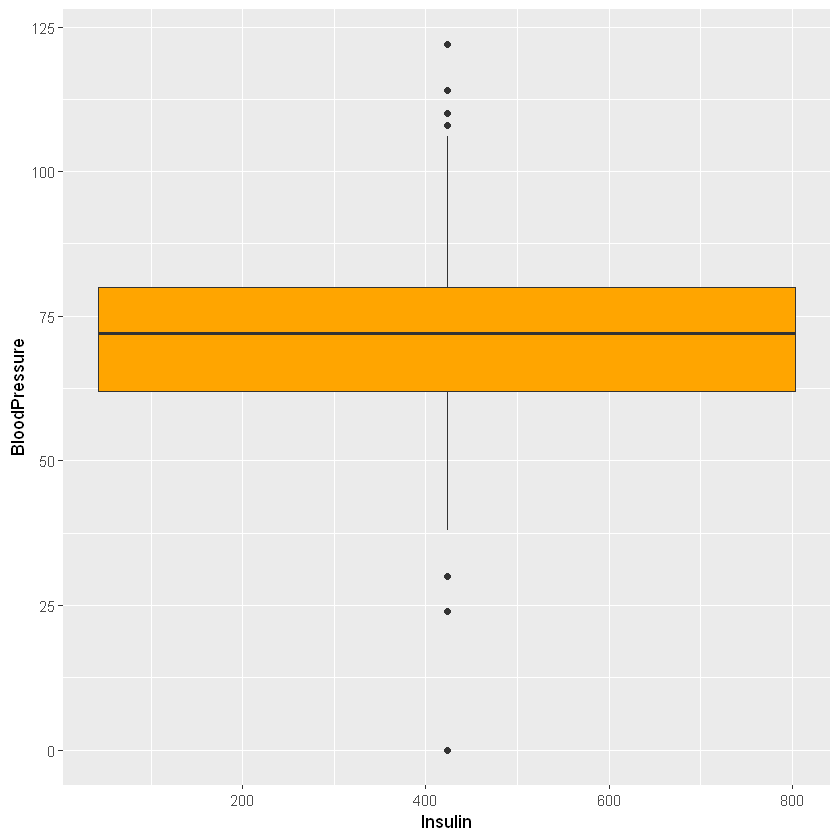

In [52]:
# boxplot of Insulin and blood pressure data
data %>%
    ggplot(aes(x=Insulin,y=BloodPressure,group = 1))+
    geom_boxplot(fill='orange')+
    xlab('Insulin')+
    ylab('BloodPressure')
    facet_grid(~Glucose)

## Data Transformation

In [39]:
data$Outcome <- as.factor(data$Outcome)
summary(data)

  Pregnancies        Glucose      BloodPressure    SkinThickness  
 Min.   : 0.000   Min.   :  0.0   Min.   :  0.00   Min.   : 0.00  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 62.00   1st Qu.: 0.00  
 Median : 3.000   Median :117.0   Median : 72.00   Median :23.00  
 Mean   : 3.845   Mean   :120.9   Mean   : 69.11   Mean   :20.54  
 3rd Qu.: 6.000   3rd Qu.:140.2   3rd Qu.: 80.00   3rd Qu.:32.00  
 Max.   :17.000   Max.   :199.0   Max.   :122.00   Max.   :99.00  
    Insulin           BMI        DiabetesPedigreeFunction      Age       
 Min.   :  0.0   Min.   : 0.00   Min.   :0.0780           Min.   :21.00  
 1st Qu.:  0.0   1st Qu.:27.30   1st Qu.:0.2437           1st Qu.:24.00  
 Median : 30.5   Median :32.00   Median :0.3725           Median :29.00  
 Mean   : 79.8   Mean   :31.99   Mean   :0.4719           Mean   :33.24  
 3rd Qu.:127.2   3rd Qu.:36.60   3rd Qu.:0.6262           3rd Qu.:41.00  
 Max.   :846.0   Max.   :67.10   Max.   :2.4200           Max.   :81.00  
 Outcome
 0:5

In [40]:
library(caret) #package of Machine learning 
pre_process_data <- preProcess(data,method='range')
train_data <- predict(pre_process_data,newdata = data)
levels(train_data$Outcome) <- c("NO","YES")


In [41]:
head(train_data)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,0.35294118,0.7437186,0.5901639,0.3535354,0.0000000,0.5007452,0.23441503,0.4833333,YES
2,0.05882353,0.4271357,0.5409836,0.2929293,0.0000000,0.3964232,0.11656704,0.1666667,NO
3,0.47058824,0.9195980,0.5245902,0.0000000,0.0000000,0.3472429,0.25362938,0.1833333,YES
4,0.05882353,0.4472362,0.5409836,0.2323232,0.1111111,0.4187779,0.03800171,0.0000000,NO
5,0.00000000,0.6884422,0.3278689,0.3535354,0.1985816,0.6423249,0.94363792,0.2000000,YES
6,0.29411765,0.5829146,0.6065574,0.0000000,0.0000000,0.3815201,0.05251921,0.1500000,NO


In [42]:
prop.table(table(train_data$Outcome))


       NO       YES 
0.6510417 0.3489583 

In [58]:
library(corrplot)
library(ggplot2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.00000000,0.12945867,0.14128198,-0.08167177,-0.07353461,0.01768309,-0.03352267,0.54434123
Glucose,0.12945867,1.00000000,0.15258959,0.05732789,0.33135711,0.22107107,0.13733730,0.26351432
BloodPressure,0.14128198,0.15258959,1.00000000,0.20737054,0.08893338,0.28180529,0.04126495,0.23952795
SkinThickness,-0.08167177,0.05732789,0.20737054,1.00000000,0.43678257,0.39257320,0.18392757,-0.11397026
Insulin,-0.07353461,0.33135711,0.08893338,0.43678257,1.00000000,0.19785906,0.18507093,-0.04216295
BMI,0.01768309,0.22107107,0.28180529,0.39257320,0.19785906,1.00000000,0.14064695,0.03624187
DiabetesPedigreeFunction,-0.03352267,0.13733730,0.04126495,0.18392757,0.18507093,0.14064695,1.00000000,0.03356131
Age,0.54434123,0.26351432,0.23952795,-0.11397026,-0.04216295,0.03624187,0.03356131,1.00000000


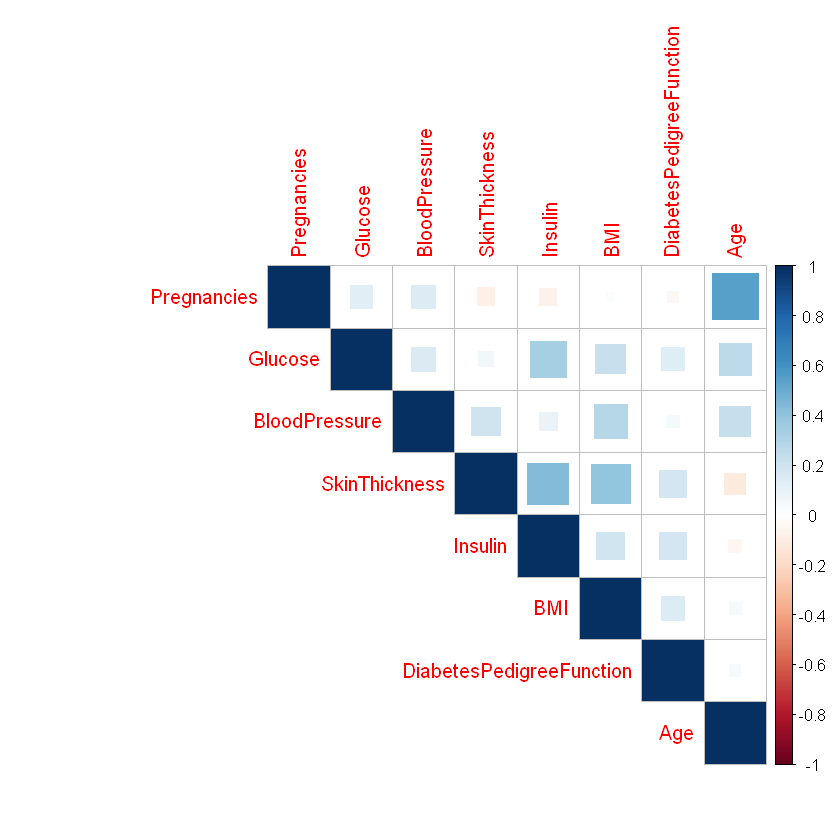

In [64]:
cor_data <- cor(train_data[,1:8])
cor_data
corrplot(cor_data,method='square',type='upper')

In [70]:
# Fit Control
fit_control = trainControl(
    method = 'cv',   # k-fold cross validation
    number = 5,    # number of folds
    savePredictions = 'final',  #save predictions for optimal tuning parameter
    classProbs = T,  # class probability
    summaryFunction=twoClassSummary # result summary function
    
)

In [71]:
model_knn = train(Outcome ~ .,data=train_data,method='knn',tuneLength = 2,trControl = fit_control) # KNN model
model_svm = train(Outcome ~ .,data=train_data,method='svmRadial',tuneLength = 2,trControl = fit_control) # SVM model
model_rand = train(Outcome ~ .,data=train_data,method='rpart',tuneLength = 2,trControl = fit_control) # RandomForest model


Warning message in train.default(x, y, weights = w, ...):
"The metric "Accuracy" was not in the result set. ROC will be used instead."
Warning message in train.default(x, y, weights = w, ...):
"The metric "Accuracy" was not in the result set. ROC will be used instead."
Warning message in train.default(x, y, weights = w, ...):
"The metric "Accuracy" was not in the result set. ROC will be used instead."


In [72]:
# Compare model performace using resamples()
model_compare <- resamples(list(KNN=model_knn,SVM=model_svm,RandomForest=model_rand))

# Summary of model's performace

summary(model_compare)


Call:
summary.resamples(object = model_compare)

Models: KNN, SVM, RandomForest 
Number of resamples: 5 

ROC 
                  Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
KNN          0.7358491 0.7713889 0.7766038 0.7756202 0.7930556 0.8012037    0
SVM          0.8007547 0.8227778 0.8290566 0.8249623 0.8331481 0.8390741    0
RandomForest 0.6647222 0.6907547 0.6990741 0.7191932 0.7500000 0.7914151    0

Sens 
             Min. 1st Qu. Median  Mean 3rd Qu. Max. NA's
KNN          0.81    0.83   0.84 0.842    0.85 0.88    0
SVM          0.81    0.87   0.88 0.874    0.89 0.92    0
RandomForest 0.74    0.75   0.80 0.814    0.87 0.91    0

Spec 
                  Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
KNN          0.4150943 0.4814815 0.5555556 0.5221523 0.5660377 0.5925926    0
SVM          0.4814815 0.4905660 0.5740741 0.5748428 0.6111111 0.7169811    0
RandomForest 0.4259259 0.6226415 0.6296296 0.5935709 0.6415094 0.6481481    0


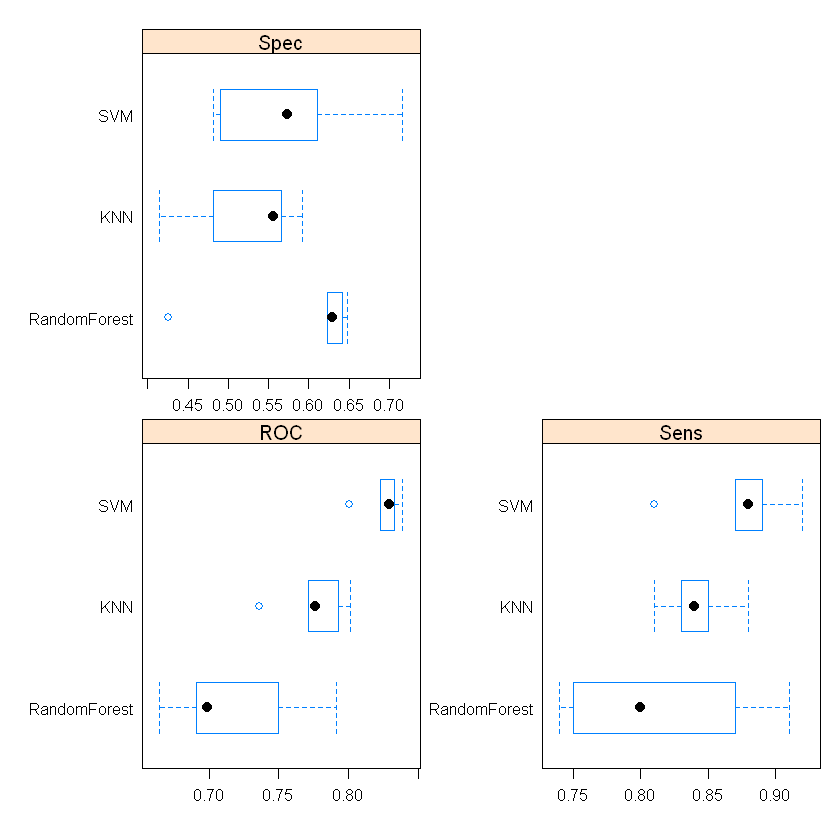

In [73]:
scales <- list(x=list(relation="free"),y=list(relation="free"))
bwplot(model_compare,scales=scales)